Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

Training Image preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/iml_image_recognition_system/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3117 files belonging to 36 classes.


Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/iml_image_recognition_system/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


Building Model

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D
from tensorflow.keras.models import Sequential

In [ ]:
cnn = tf.keras.models.Sequential()

Building Convolution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25)) #To avoid overfitting


In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

Compiling and Training Phase

In [ ]:

 cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



In [ ]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 62, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.2381 - loss: 2.8706
Validation accuracy: 0.2421652376651764
Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.0450 - loss: 3.8627 - val_accuracy: 0.0655 - val_loss: 3.3855
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.0691 - loss: 3.4136 - val_accuracy: 0.1823 - val_loss: 3.1062
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.1093 - loss: 3.1776 - val_accuracy: 0.3219 - val_loss: 2.5530
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.1799 - loss: 2.8074 - val_accuracy: 0.4160 - val_loss: 2.2534
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.2320 - loss: 2.6103 - val_accuracy: 0.5527 - val_loss: 1.6974
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.3207 - loss: 2.2392 - val_accuracy: 0.6068 - val_loss: 1.5600
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.3891 - loss: 2.0350 - val_accuracy: 0.7379 - val_loss: 1.112

Saving Model

In [ ]:
cnn.save('trained_model(new).h5')

In [ ]:
training_history.history #Return Dictionary of history

{'accuracy': [0.042669232934713364,
  0.08245107531547546,
  0.13025344908237457,
  0.19217196106910706,
  0.2544112801551819,
  0.34231632947921753,
  0.41257619857788086,
  0.5322425365447998,
  0.6137311458587646,
  0.6586461067199707,
  0.7083734273910522,
  0.790182888507843,
  0.8094321489334106,
  0.8370227813720703,
  0.8649342060089111,
  0.8633301258087158,
  0.8777670860290527,
  0.8995829224586487,
  0.909528374671936,
  0.9092075824737549,
  0.9233236908912659,
  0.9326274991035461,
  0.9409688711166382,
  0.9297401309013367,
  0.9441770911216736,
  0.954764187335968,
  0.9586140513420105,
  0.9570099711418152,
  0.9505935311317444,
  0.9489893913269043,
  0.9496310353279114,
  0.9233236908912659],
 'loss': [3.6299636363983154,
  3.348761558532715,
  3.074174642562866,
  2.7474935054779053,
  2.5348362922668457,
  2.20282244682312,
  1.942773699760437,
  1.5743108987808228,
  1.2945574522018433,
  1.146378993988037,
  0.96357262134552,
  0.6924761533737183,
  0.62226855754

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Calculating Accuracy of Model Achieved on Validation set

In [ ]:

print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 95.44159770011902 %


Accuracy Visualization

Training Visualization

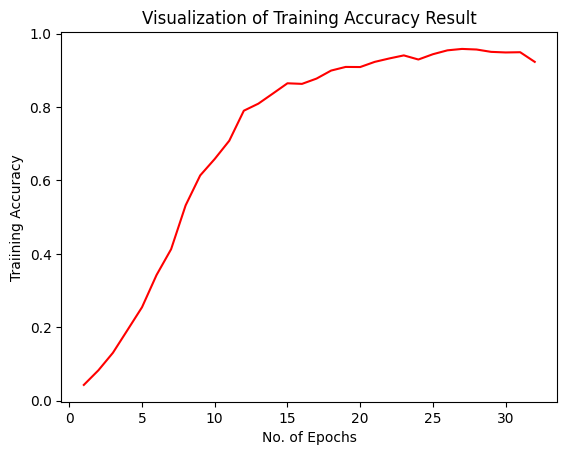

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

Validation Accuracy

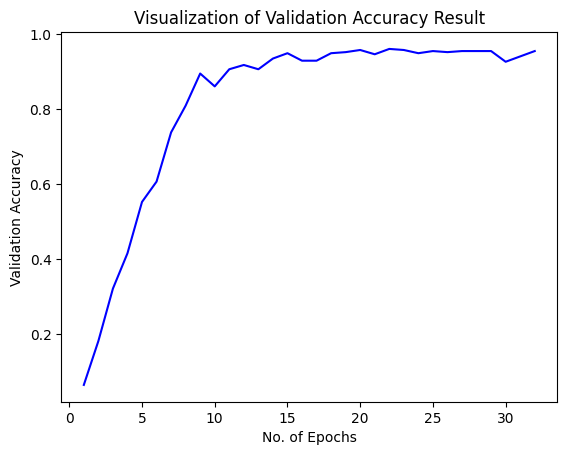

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

Test set Evaluation

In [ ]:
import tensorflow as tf
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/iml_image_recognition_system/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [ ]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.9581 - loss: 0.2246
Test accuracy: 0.9554317593574524
